## Producto Interior Bruto (PIB)

Porcentaje de variación del PIB anual de Mexico

- DataFrame --> df_PIB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funciones_variables import variable_porcentaje, tipo_cambio

In [2]:
root_PIB = "Variables_economicas/PIB_total.csv"
df_PIB = tipo_cambio(root_PIB)
df_PIB = df_PIB.rename(columns= {'PIB (US$ a precios actuales)': 'PIB(millones€)'})

In [3]:
df_PIB

variables,PIB(millones€)
1993,445354.66
1994,423675.69
1995,268867.19
1996,325533.77
1997,457127.72
1998,448895.72
1999,595791.15
2000,751159.85
2001,849402.82
2002,735354.12


In [5]:
df_PIB.describe()

variables,PIB(millones€)
count,2.800000e+01
mean,7.448514e+05
std,2.425482e+05
min,2.688672e+05
25%,5.788384e+05
50%,7.459626e+05
75%,9.158807e+05
max,1.131452e+06


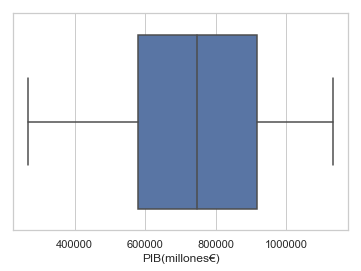

In [6]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_PIB["PIB(millones€)"])

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


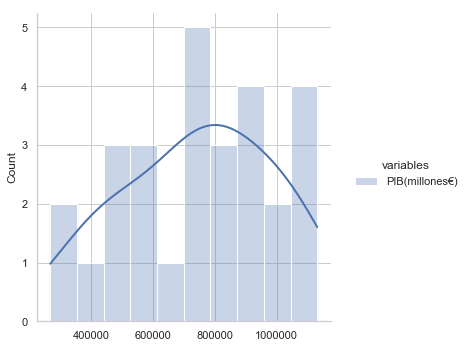

In [7]:
sns.displot(df_PIB, bins=10, line_kws= {'linewidth': 2},
        alpha   = 0.3, kde     = True);

Text(0.5, 1.0, 'Evolución del PIB en México')

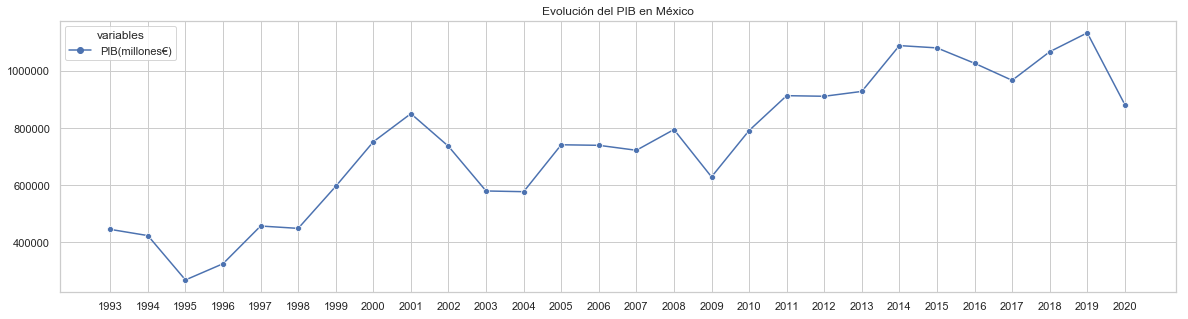

In [8]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_PIB, markers =True)
plt.title('Evolución del PIB en México')

In [9]:
df_PIB.loc[df_PIB['PIB(millones€)'] == df_PIB['PIB(millones€)'].max()]

variables,PIB(millones€)
2019,1131451.85


In [10]:
df_PIB.loc[df_PIB['PIB(millones€)'] == df_PIB['PIB(millones€)'].min()]

variables,PIB(millones€)
1995,268867.19


In [11]:
%store df_PIB

Stored 'df_PIB' (DataFrame)
